In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

tf.test.is_gpu_available()

2.0.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.17.4
pandas 0.25.3
sklearn 0.22
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


False

In [2]:
# 在打开网址时出现和ssl证书相关的问题时，需要加上这句话
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# 采用房屋预测模型数据
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
from sklearn.model_selection import train_test_split

x_train_all,x_test,y_train_all,y_test = train_test_split(
    housing.data,housing.target,random_state = 7)
x_train,x_valid,y_train,y_valid = train_test_split(
    x_train_all,y_train_all,random_state = 11)
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
# 进行数据归一化处理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_valid)
x_test_scaled = scaler.fit_transform(x_test)

In [6]:
# 使用RandomizedSearchCV
# 1.转化为sklearn的model
# 2.定义参数集合
# 3.搜索参数

def build_model(hidden_layers = 1,
                layer_size = 30,
                learning_rate = 3e-3):
    """"""
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(layer_size,activation='relu',input_shape=x_train.shape[1:]))
    for _ in range(hidden_layers-1):
        model.add(keras.layers.Dense(layer_size,activation='relu'))
    
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss='mse',optimizer=optimizer)
    return model

# 使用api定义sklearn_model，其中build_fn是一个生成tf2model的方法
sklearn_model = keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model)
callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]
history = sklearn_model.fit(x_train_scaled,y_train,epochs = 100,
                  validation_data = (x_valid_scaled,y_valid),
                  callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 53us/sample - loss: 1.1487 - val_loss: 0.6958
Epoch 2/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.6117 - val_loss: 0.6117
Epoch 3/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5496 - val_loss: 0.5569
Epoch 4/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5127 - val_loss: 0.5332
Epoch 5/100
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4950 - val_loss: 0.5059
Epoch 6/100
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4792 - val_loss: 0.5061
Epoch 7/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.4732 - val_loss: 0.4850
Epoch 8/100
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4609 - val_loss: 0.4724
Epoch 9/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.451

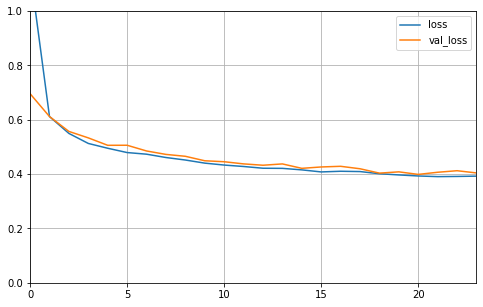

In [7]:
# 把值的变化过程打印出来
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)
    

In [8]:
np.arange(1,100)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [9]:
from scipy.stats import reciprocal
reciprocal.rvs(1e-4,1e-2,size=10) # 看下取值

array([0.00015035, 0.00448912, 0.00107138, 0.00010776, 0.00060561,
       0.00257746, 0.00204082, 0.0018392 , 0.00184261, 0.00587845])

In [12]:
from scipy.stats import reciprocal
# f(x) = 1/(x*log(b/a))  a<=x<=b

param_distribution = {
    "hidden_layers":[1,2,3,4],
    "layer_size":np.arange(1,100),
    "learning_rate":reciprocal(1e-4,1e-2),
}


from sklearn.model_selection import RandomizedSearchCV

random_search_cv = RandomizedSearchCV(sklearn_model,
                                     param_distribution,
                                     n_iter = 10,
                                     n_jobs = 1)
random_search_cv.fit(x_train_scaled,y_train,epochs = 100,
                    validation_data = (x_valid_scaled,y_valid),
                    callbacks = callbacks)

TypeError: Singleton array array(100) cannot be considered a valid collection.